# Sedge grasses and smut fungi

This notebook rebuilds the co-phylogeny of sedge grasses and their smut fungi 
parasites found in [*Phylogenetic congruence of parasitic smut fungi 
(Anthracoidea, Anthracoideaceae) and their host plants (Carex, Cyperaceae): 
Cospeciation or host-shift speciation?*](http://www.amjbot.org/content/102/7/1108.full),
by Marcial Escudero.

### Required software

Python packages (available through pip) :

* `biopython` : talking to NCBI, manipulating file formats
* `pandas` : keeping our data organized
* `ete3` : visualization for phylogenetic trees

System packages :

* [`clustalo`](http://www.clustal.org/omega/) : multiple sequence alignments
* [`RAxML`](http://sco.h-its.org/exelixis/web/software/raxml/index.html) : phylogenetic tree inference

In [1]:
sedge_outgroup = { 
    'Dulichium arundinacea'    : [ 'DQ998949', 'DQ998895', 'DQ999002' ],
    'Eriophorum angustifolium' : [ 'DQ998950', 'DQ998896', 'DQ999003' ],
    'Eriophorum vaginatum'     : [ 'AY242008', 'AY242009', 'AY757692' ],
    'Trichophorum alpinum'     : [ 'AY757432', 'AY757400', 'AY757496' ],
    'Trichophorum cespitosum'  : [ 'DQ998951', 'DQ998897', 'DQ999004' ],
    }

sedge_ingroup = {
    'Unicinia rubra'       : [ 'AY012628', 'AY012629', 'AY115852' ],
    'Carex rupestris'      : [ 'AY244521', 'AY244522', 'AF164934' ],
    'Kobresia myosuroides' : [ 'AY242036', 'AY242037', 'AY757566', 'AF284985' ],
    'Carex curvula'        : [ 'AY242030', 'AY242031', 'AY757564' ],
    'Carex baldensis'      : [ 'GU176152', 'EF363121', 'GU176107' ],
    'Carex chordorrhiza'   : [ 'AY757409', 'AY757389', 'AY757485' ],
    'Carex heleonastes'    : [ 'AY757418', 'AY757388', 'AY757484' ],
    'Carex brunnescens'    : [ 'DQ115114', 'DQ115115', 'AY757481' ],
    'Carex lachenalii'     : [ 'EU288556', 'EU288440' ],
    'Carex arenaria'       : [ 'DQ115100', 'DQ115101' ],
    'Carex dioica'         : [ 'DQ115146', 'DQ115147', 'AF191816' ],
    'Carex davalliana'     : [ 'EU288548', 'EU288432' ],
    'Carex parallela'      : [ 'EU001046', 'EU001195', 'GQ244737' ],
    'Carex paniculata'     : [ 'EU288562', 'DQ115237', 'EU288446' ],
    'Carex echinata'       : [ 'AY757415', 'AY757381', 'AY757477' ],
    'Carex muricata'       : [ 'AF285036', 'AF284934' ],
    'Carex ornithopoda'    : [ 'AY278269', 'KR857280' ],
    'Carex panicea'        : [ 'DQ998937', 'DQ998883', 'DQ998990' ],
    'Carex meadii'         : [ 'KR857284', 'KR857281' ],
    'Carex atrofusca'      : [ 'AY278313', 'AM085581' ],
    'Carex flacca'         : [ 'DQ998915', 'DQ998862', 'DQ998968' ],
    'Carex buxbaumii'      : [ 'EU288545', 'EU288428' ],
    'Carex digitata'       : [ 'AY757624', 'AY757684', 'AY757552' ],
    'Carex bigelowii'      : [ 'GQ223580', 'GQ223498', 'GQ244699' ],
    'Carex ferruginea'     : [ 'EU288550', 'EU288434' ],
    'Carex glacilalis'     : [ 'AY757625', 'AY757685', 'AY757553' ],
    'Carex pilulifera'     : [ 'AF284975', 'AY325438', 'AF284873' ],
    'Carex alba'           : [ 'AY278259', 'KR857282' ],
    'Carex firma'          : [ 'AF284995', 'AF284893' ],
    'Carex sempervirens'   : [ 'EU288565', 'EU288449' ],
    'Carex capillaris'     : [ 'DQ998905', 'DQ998852', 'DQ998958' ],
    'Carex limosa'         : [ 'AY757595', 'AY757656', 'AY757522' ],
    'Carex magellanica'    : [ 'AY278292', 'AY757655', 'AY757521' ],
    'Carex hostiana'       : [ 'EU288555', 'JX409830', 'EU288439' ],
    'Carex hirta'          : [ 'EU288553', 'EU288437' ],
    'Carex elata'          : [ 'AY770470', 'AY770440', 'HM590257' ],
    'Carex globularis'     : [ 'AF285049', 'AF284947' ],
    'Carex vesicaria'      : [ 'AY278289', 'KR857283' ],
    'Carex rostrata'       : [ 'EU288564', 'EU288448' ],
    'Carex riparia'        : [ 'AY757571', 'AY757633', 'AY757498' ],
    'Carex lasiocarpa'     : [ 'DQ998925', 'DQ998872', 'DQ998978' ]
    }

In [2]:
smut_outgroup = {
    'Sporisorium monakai'           : [ 'AY740161' ], 
    'Sporisorium pseudechinolaenae' : [ 'AY740139' ], 
    'Sporisorium manilense'         : [ 'AY740112' ],
    'Shivasia solida'               : [ 'JF966729' ],
    'Shivasia solida'               : [ 'JF966730' ]
    }
    
smut_ingroup = {
    'Anthracoidea caricis-meadii' : [ 'JN863083' ], 
    'Anthracoidea carphae'        : [ 'AY563614', 'DQ875359' ], 
    'Anthracoidea sclerotiformis' : [ 'AY563613', 'DQ363331' ],
    'Anthracoidea curvulae'       : [ 'AY563612', 'AY563611' ],
    'Anthracoidea elynae'         : [ 'AY563610', 'AY563609' ],
    'Anthracoidea sp 1'           : [ 'AY563608' ],
    'Anthracoidea aspera'         : [ 'AY563607' ],
    'Anthracoidea arenaria'       : [ 'AY563606' ],
    'Anthracoidea inclusa'        : [ 'AY563605' ],
    'Anthracoidea subinclusa'     : [ 'AY563604', 'AY563603', 'AY563602' ],
    'Anthracoidea heterospora'    : [ 'AY563601', 'AY563600' ],
    'Anthracoidea baldensis'      : [ 'AY563599' ],
    'Anthracoidea rupestris'      : [ 'AY563598' ],
    'Anthracoidea vankyi'         : [ 'AY563597' ],
    'Anthracoidea capillaris'     : [ 'AY563596' ],
    'Anthracoidea caricis-albae'  : [ 'AY563595', 'AY563594' ],
    'Anthracoidea globularis'     : [ 'AY563593' ],
    'Anthracoidea irregularis'    : [ 'AY563592', 'AY563591', 'AY563590' ],
    'Anthracoidea caricis'        : [ 'AY563589' ],
    'Anthracoidea sp 2'           : [ 'AY563588' ],
    'Anthracoidea sempervirentis' : [ 'AY563587', 'AY563586', 'AY563585' ],
    'Anthracoidea misandrae'      : [ 'AY563584' ],
    'Anthracoidea lasiocarpae'    : [ 'AY563583' ],
    'Anthracoidea buxbaumii'      : [ 'AY563582' ],
    'Anthracoidea hostianae'      : [ 'AY563581' ],
    'Anthracoidea paniceae'       : [ 'AY563580' ],
    'Anthracoidea karii'          : [ 'AY563579', 'AY563578', 'AY563577', 'AY563576',
                                      'AY563575', 'AY563574', 'DQ875358' ],
    'Anthracoidea limosa'         : [ 'AY563573', 'AY563572' ],
    'Anthracoidea turfosa'        : [ 'AY563571', 'AY563570', 'AY563569' ],
    'Anthracoidea bigelowii'      : [ 'AY563568', 'AY563567', 'AY563566' ],
    'Anthracoidea pratensis'      : [ 'AY563565', 'AY563564', 'AY563563', 'DQ875360' ]
    }

## Download and identify genes from NCBI

In [64]:
from Bio import Entrez
from Bio.SeqIO import parse
from Bio.SeqRecord import SeqRecord
from StringIO import StringIO
import pandas

Entrez.email = "ryneches@ucdavis.edu"

sedge_genes = {
    '5.8S' : [ '5.8S ribosomal RNA' ],
    '1F'   : [ 'external transcribed spacer' ],
    'TRNL' : [ 'tRNA-Leu', 'trnL' ],
    }

smut_genes = {
    'LSU' : [ 'large subunit ribosomal RNA' ],
    '1F'   : [ 'external transcribed spacer' ],
    'TRNL' : [ 'tRNA-Leu', 'trnL' ],
    }

def match_gene( description, nametable ) :
    for gene in nametable.keys() :
        for genestring in nametable[gene] :
            if description.__contains__( genestring ) :
                return gene
                
sedge_genetable = {}
smut_genetable = {}

#for key in sedge_outgroup.keys() :
#    sedge_genetable[key] = {}
#    for accn in sedge_outgroup[key] :
#        fasta = Entrez.efetch( db='nucleotide', id=accn, rettype='fasta', retmode='fasta' ).read()
#        record = parse( StringIO( fasta ) , 'fasta' ).next()
#        gene = match_gene( record.description, sedge_genes )
#        sedge_genetable[key][gene] = record
#    print key, ':', ', '.join( sedge_genetable[key].keys() )
    
for key in sedge_ingroup.keys() :
    sedge_genetable[key] = {}
    for accn in sedge_ingroup[key] :
        fasta = Entrez.efetch( db='nucleotide', id=accn, rettype='fasta', retmode='fasta' ).read()
        record = parse( StringIO( fasta ) , 'fasta' ).next()
        gene = match_gene( record.description, sedge_genes )
        sedge_genetable[key][gene] = record
        #print record.description
    print key, ':', ', '.join( sedge_genetable[key].keys() )

print '\nsmut alignments only use LSU gene; displaying gene lengths.\n'

for key in smut_ingroup.keys() :
    smut_genetable[key] = { 'LSU' : [] }    
    for accn in smut_ingroup[key] :
        fasta = Entrez.efetch( db='nucleotide', id=accn, rettype='fasta', retmode='fasta' ).read()
        record = parse( StringIO( fasta ) , 'fasta' ).next()
        smut_genetable[key]['LSU'].append( record )
    print key, ':', ', '.join( map( lambda x : str(len(x)), smut_genetable[key]['LSU'] ) )

Carex parallela : TRNL, 5.8S, 1F
Carex flacca : TRNL, 5.8S, 1F
Carex glacilalis : TRNL, 5.8S, 1F
Carex arenaria : 5.8S, 1F
Carex firma : TRNL, 5.8S
Carex curvula : TRNL, 5.8S, 1F
Carex heleonastes : TRNL, 5.8S, 1F
Carex limosa : TRNL, 5.8S, 1F
Carex ferruginea : TRNL, 5.8S
Carex magellanica : TRNL, 5.8S, 1F
Carex brunnescens : TRNL, 5.8S, 1F
Carex ornithopoda : 5.8S, 1F
Carex sempervirens : TRNL, 5.8S
Carex davalliana : TRNL, 5.8S
Carex paniculata : TRNL, 5.8S, 1F
Carex dioica : TRNL, 5.8S, 1F
Carex buxbaumii : TRNL, 5.8S
Carex meadii : 5.8S, 1F
Carex rostrata : TRNL, 5.8S
Carex chordorrhiza : TRNL, 5.8S, 1F
Carex capillaris : TRNL, 5.8S, 1F
Carex rupestris : TRNL, 5.8S, 1F
Carex echinata : TRNL, 5.8S, 1F
Carex lachenalii : TRNL, 5.8S
Carex alba : 5.8S, 1F
Carex atrofusca : TRNL, 5.8S
Carex globularis : TRNL, 5.8S
Carex bigelowii : TRNL, 5.8S, 1F
Carex vesicaria : 5.8S, 1F
Unicinia rubra : TRNL, 5.8S, 1F
Carex riparia : TRNL, 5.8S, 1F
Carex hostiana : TRNL, 5.8S, 1F
Carex digitata : TR

## Build the gene tables

In [85]:
def dna2len( x ) :
    if type(x) == float :
        return 0
    else :
        return len(x)

sedge_genetable = pandas.DataFrame( sedge_genetable ).T
sedge_genetable.applymap( dna2len )

,1F,5.8S,TRNL
Carex alba,575,661,0
Carex arenaria,595,608,0
Carex atrofusca,0,639,1024
Carex baldensis,591,607,1014
Carex bigelowii,557,610,650
Carex brunnescens,597,608,1039
Carex buxbaumii,0,616,991
Carex capillaris,596,596,1024
Carex chordorrhiza,545,628,1036
Carex curvula,588,606,1029


In [72]:
# we only have one gene for the smut fungi, so let's take the
# longsest example of each
for key in smut_genetable.keys() :
    lengths = map( len, smut_genetable[key]['LSU'] )
    i = lengths.index( max(lengths) )
    smut_genetable[key]['LSU'] = smut_genetable[key]['LSU'][i]

smut_genetable = pandas.DataFrame( smut_genetable ).T
smut_genetable.applymap( len )

,LSU
Anthracoidea arenaria,640
Anthracoidea aspera,1089
Anthracoidea baldensis,1089
Anthracoidea bigelowii,1112
Anthracoidea buxbaumii,673
Anthracoidea capillaris,1086
Anthracoidea caricis,1088
Anthracoidea caricis-albae,1083
Anthracoidea caricis-meadii,734
Anthracoidea carphae,708


In [99]:
for gene in sedge_genetable.columns :
    f = open( 'sedge_' + gene + '.fasta', 'w' )
    g = sedge_genetable[gene].dropna()
    for species, item in g.iteritems() :
        item.description = ''
        item.name = ''
        item.id = species.replace(' ','_').replace('-','_')
        f.write( item.format('fasta') )
    f.close()

for gene in smut_genetable.columns :
    f = open( 'smut_' + gene + '.fasta', 'w' )
    g = smut_genetable[gene].dropna()
    for species, item in g.iteritems() :
        item.description = ''
        item.name = ''
        item.id = species.replace(' ','_').replace('-','_')
        f.write( item.format('fasta') )
    f.close()

In [100]:
!clustalo -v --threads 4 -i sedge_1F.fasta        -o sedge_1F_aln.fasta
!echo
!clustalo -v --threads 4 -i sedge_5.8S.fasta      -o sedge_5.8S_aln.fasta
!echo
!clustalo -v --threads 4 -i sedge_TRNL.fasta      -o sedge_TRNL_aln.fasta
!echo
!clustalo -v --threads 4 -i smut_LSU.fasta        -o smut_LSU_aln.fasta
!echo

Using 4 threads
Read 30 sequences (type: Protein) from sedge_1F.fasta
not more sequences (30) than cluster-size (100), turn off mBed
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 0.33u 0.00s 00:00:00.33 Elapsed: 00:00:00
Guide-tree computation done.
Progressive alignment progress done. CPU time: 3.75u 0.15s 00:00:03.90 Elapsed: 00:00:02
Alignment written to sedge_1F_aln.fasta

Using 4 threads
Read 41 sequences (type: DNA) from sedge_5.8S.fasta
not more sequences (41) than cluster-size (100), turn off mBed
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 0.27u 0.00s 00:00:00.27 Elapsed: 00:00:00
Guide-tree computation done.
Progressive alignment progress done. CPU time: 4.50u 0.21s 00:00:04.71 Elapsed: 00:00:03
Alignment written to sedge_5.8S_aln.fasta

Using 4 threads
Read 36 sequences (type: DNA) from sedge_TRNL.fasta
not more sequences (36) than cluster-size (100), turn off mBed
Calculating p

In [101]:
from Bio import AlignIO
from Bio.Nexus import Nexus
from Bio import Alphabet
from glob import glob

print 'making sedge nexus and phylip files...'

nexi = [ (alnfile, Nexus.Nexus( AlignIO.read( alnfile, 'fasta', alphabet=Alphabet.generic_dna  ).format('nexus') ) ) 
          for alnfile in glob( 'sedge*_aln.fasta' ) ]
combined = Nexus.combine( nexi )
f = open('sedge.nex', 'w')
combined.write_nexus_data(f)
f.close()

# RAxML needs a phylip file
combined.export_phylip('sedge.phylip')

# RAxML partition file
f = open( 'sedge.txt', 'w' )
for key in combined.charsets.keys() :
    s = 'DNA, ' + key.split('_')[1] + ' = ' + str(combined.charsets[key][0]+1) + '-' + str(combined.charsets[key][-1]+1)
    f.write( s + '\n' )
    print s
f.close()

print 'making smut nexus and phylip files...'

nexi = [ (alnfile, Nexus.Nexus( AlignIO.read( alnfile, 'fasta', alphabet=Alphabet.generic_dna  ).format('nexus') ) ) 
          for alnfile in glob( 'smut*_aln.fasta' ) ]
combined = Nexus.combine( nexi )
f = open('smut.nex', 'w')
combined.write_nexus_data(f)
f.close()

# RAxML needs a phylip file
combined.export_phylip('smut.phylip')

# RAxML partition file
f = open( 'smut.txt', 'w' )
for key in combined.charsets.keys() :
    s = 'DNA, ' + key.split('_')[1] + ' = ' + str(combined.charsets[key][0]+1) + '-' + str(combined.charsets[key][-1]+1)
    f.write( s + '\n' )
    print s
f.close()

making sedge nexus and phylip files...
DNA, 5.8S = 1-727
DNA, 1F = 728-1368
DNA, TRNL = 1369-3115
making smut nexus and phylip files...
DNA, LSU = 1-1241


In [102]:
!raxmlHPC -m GTRGAMMA -q sedge.txt -s sedge.phylip -n sedge -p 10001
!raxmlHPC -m GTRGAMMA -q smut.txt  -s smut.phylip  -n smut  -p 10001

Use raxml with AVX support (2 cpus)
RAxML output files with the run ID <sedge> already exist 
in directory /home/russell/Projects/SuchTree/data/sedge-smut/ ...... exiting
Use raxml with AVX support (2 cpus)


Using BFGS method to optimize GTR rate parameters, to disable this specify "--no-bfgs" 


This is the RAxML Master Pthread

This is RAxML Worker Pthread Number: 1


This is RAxML version 8.2.9 released by Alexandros Stamatakis on July 20 2016.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Kassian Kobert    (HITS)
David Dao         (KIT and HITS)
Sarah Lutteropp   (KIT and HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
Charlie Taylor    (UF)


Alignment has 527 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 19.97%

RAxML rapid hill-climbing mode

Using 1 distinct models/data partitions with joint branch length 

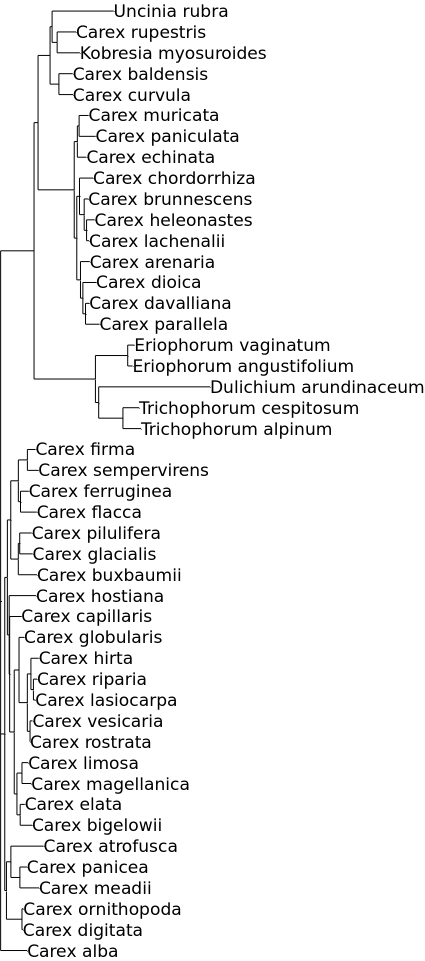

In [103]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 1000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'RAxML_bestTree.sedge' )

#ete_tree.set_outgroup('Claravis_pretiosa')

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=120, units="mm", tree_style=ts)

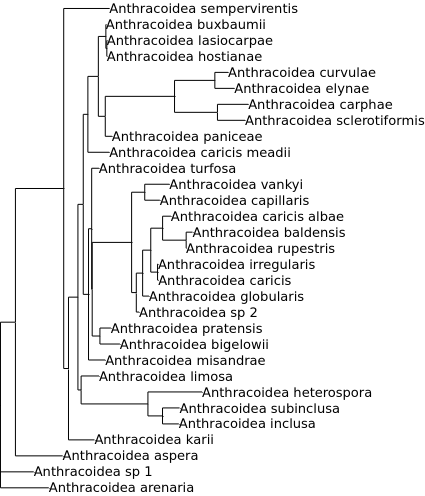

In [104]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 1000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'RAxML_bestTree.smut' )

#ete_tree.set_outgroup('Claravis_pretiosa')

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=120, units="mm", tree_style=ts)